[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset loaded for stopword removal


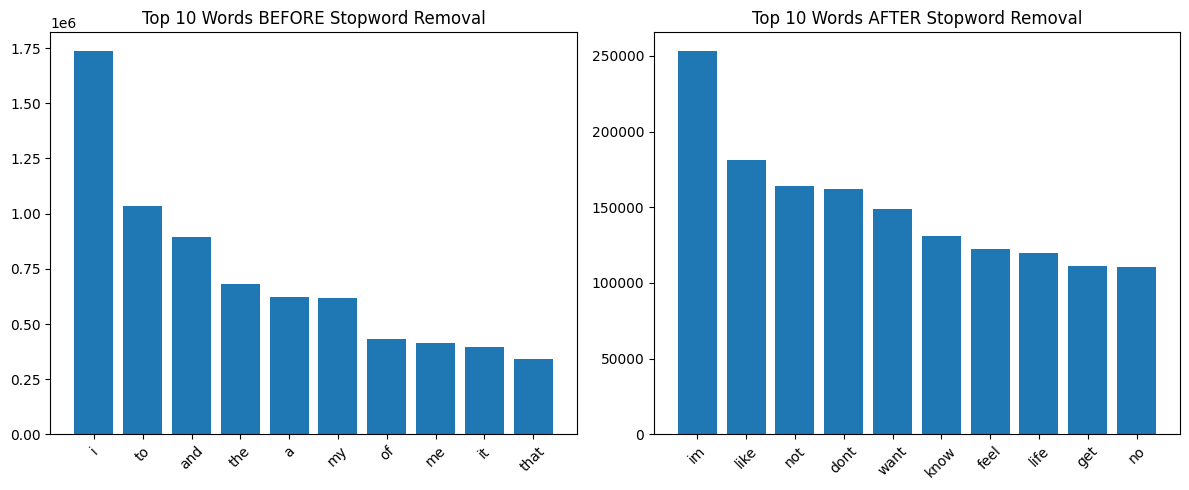

Stopword-removed dataset saved as: suicide_detection_stopword_removed.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

input_file = "suicide_detection_punctuation_removed.csv"
df = pd.read_csv(input_file)

df["text"] = df["text"].astype(str)
df = df[df["text"].str.strip() != ""]


print("Dataset loaded for stopword removal")


stop_words = set(stopwords.words("english"))

negations_to_keep = {"not", "no", "never", "without", "don’t"}

stop_words = stop_words - negations_to_keep


def get_top_words(text_series, n=10):
    words = " ".join(text_series).split()
    return Counter(words).most_common(n)

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])


top_before = get_top_words(df["text"], 10)

df["text"] = df["text"].apply(remove_stopwords)

top_after = get_top_words(df["text"], 10)



before_words, before_counts = zip(*top_before)
after_words, after_counts = zip(*top_after)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(before_words, before_counts)
plt.title("Top 10 Words BEFORE Stopword Removal")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.bar(after_words, after_counts)
plt.title("Top 10 Words AFTER Stopword Removal")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


output_file = "suicide_detection_stopword_removed.csv"
df.to_csv(output_file, index=False)

print("Stopword-removed dataset saved as:", output_file)
